# Gillian Tatreau
# 12 August 2023

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
# columns that should be imported as categorical variables instead of numerical (ordinal data read as numerical)
cat = {"Education": object, "EnvironmentSatisfaction": object, "JobInvolvement": object, "JobLevel": object, 
       "JobSatisfaction": object, "PerformanceRating": object, "RelationshipSatisfaction": object, 
       "WorkLifeBalance": object, "StockOptionLevel": object}
# import data frame
df = pd.read_csv("/Users/gillian/Documents/Bellevue Grad Program/Summer 2023/DSC630/HR_Analytics.csv.csv", dtype= cat)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# categorical variables
cat_cols = ['Attrition', 'BusinessTravel', 'Department', 
            'Education', 'EducationField', 'EnvironmentSatisfaction', 
            'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 
            'JobSatisfaction', 'MaritalStatus', 'Over18', 
            'OverTime', 'PerformanceRating', 
            'RelationshipSatisfaction', 'WorkLifeBalance', 
            'StockOptionLevel']

In [4]:
# numerical columns
num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 
            'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 
            'NumCompaniesWorked', 'PercentSalaryHike', 
            'TotalWorkingYears', 'TrainingTimesLastYear', 
            'YearsAtCompany', 'YearsInCurrentRole', 
            'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [5]:
# list of value counts for categorical variables
for x in cat_cols:
    print(x)
    print(df[x].value_counts())   
    print("-"*35)

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64
-----------------------------------
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
-----------------------------------
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
-----------------------------------
Education
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64
-----------------------------------
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
-----------------------------------
EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64
-----------------------------------
Gender
Male      882
Female    588
Name: Gender, dtype: int64
---------------

In [6]:
# columns that contain only 1 unique value
for i in df.columns:
    if df[i].nunique() == 1:
        print(i)
    else:
        pass

EmployeeCount
Over18
StandardHours


We can remove EmployeeCount, Over18, and StandardHours because all three columns contain only 1 value. We can also remove EmployeeNumber as this is a unique identifier for each employee profile.

In [7]:
# remove variables with only one value and "EmployeeNumber"
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis = 1)

In [8]:
# remove "Over18" from list of categorical variables
cat_cols.remove('Over18')

In [9]:
# summary statistics for numerical columns
df.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


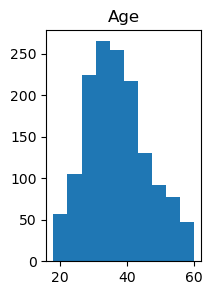

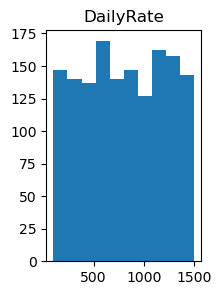

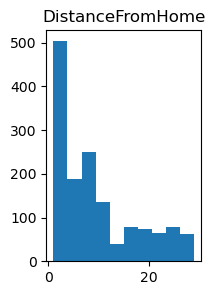

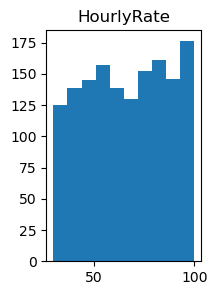

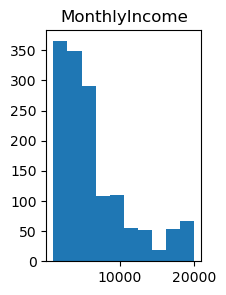

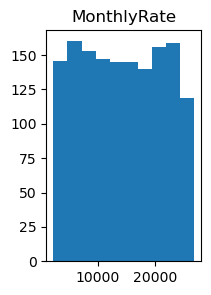

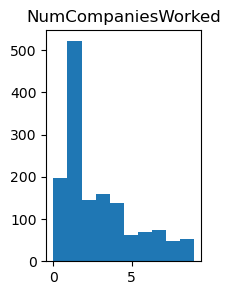

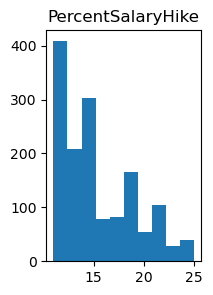

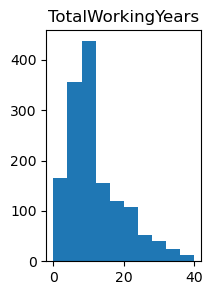

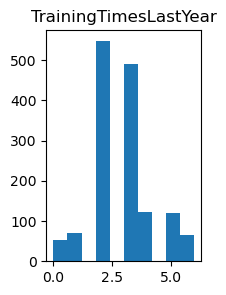

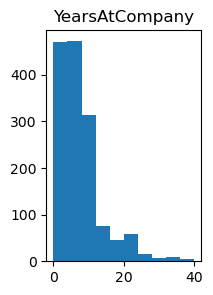

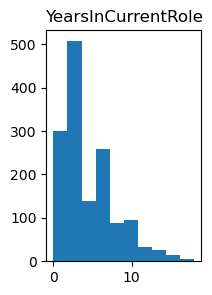

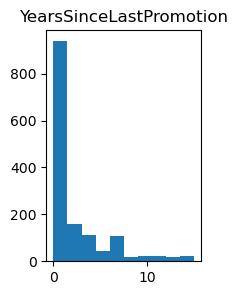

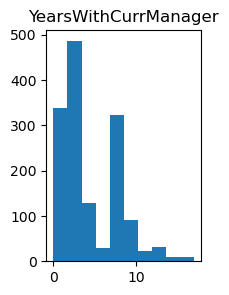

In [10]:
# histograms for numerical columns
for i in num_cols:
    figure(figsize=(2, 3))
    plt.hist(df[i])
    plt.title("{}".format(i))
    # plt.savefig("histogram-{}.png".format(i))
    plt.show()

We see that Age and TrainingTimesLastYear are relatively normally distributed. DailyRate and MonthlyRate are approximately uniformly distributed. HourlyRate appears to have a very slight negative skew, in that the higher values in the value range have a slightly higher count. The rest of the numerical variables are positively skewed, with YearsWithCurrManager possibly exhibiting a bimodal distribution as well.

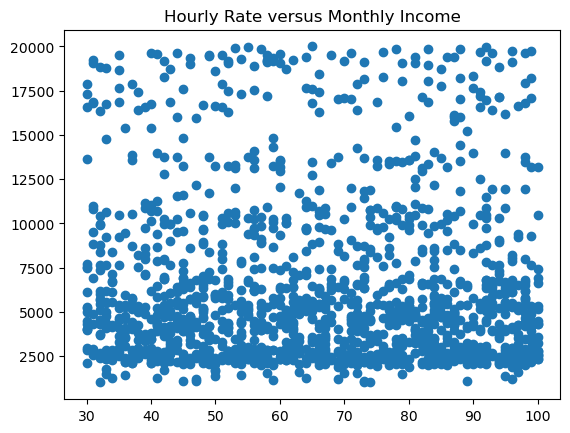

In [11]:
# scatterplot of hourly rate versus monthly income
plt.scatter(x= df["HourlyRate"], y= df["MonthlyIncome"])
plt.title("Hourly Rate versus Monthly Income")
# plt.savefig("scatterplot.png")
plt.show()

One would assume that there would be a decently strong positive relationship between hourly rate and monthly income, for if someone is making more per hour then they should also be making more each month; however, this scatterplot drives home one potential pitfall in this data: it was engineered by IBM data scientists and is not necessarily indicative of true patterns within an organization. Another, seemingly less likely, explanation of this patttern would be that people that make more per hour might work fewer hours per month which would explain the lack of relationship between these two variables, as there are confounding variables involved. 

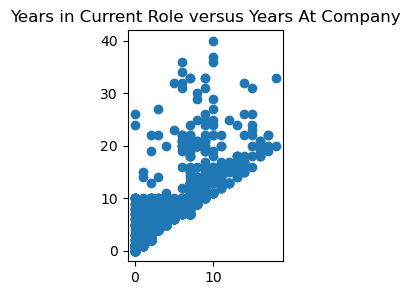

In [12]:
# scatterplot for YearsInCurrentRole versus YearsAtCompany
figure(figsize=(2, 3))
plt.scatter(x= df["YearsInCurrentRole"], y= df["YearsAtCompany"])
plt.title("Years in Current Role versus Years At Company")
# plt.savefig("scatterex1.png")
plt.show()

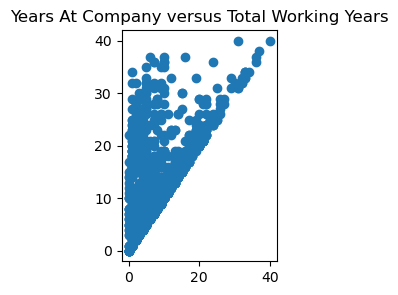

In [13]:
# scatterplot for YearsAtCompany versus TotalWorkingYears
figure(figsize=(2, 3))
plt.scatter(x= df["YearsAtCompany"], y= df["TotalWorkingYears"])
plt.title("Years At Company versus Total Working Years")
# plt.savefig("scatterex2.png")
plt.show()

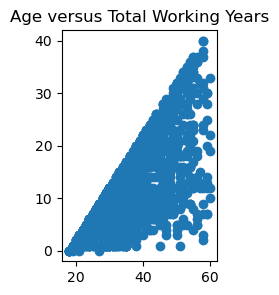

In [14]:
# scatterplot for Age versus TotalWorkingYears
figure(figsize=(2, 3))
plt.scatter(y= df["TotalWorkingYears"], x= df["Age"])
plt.title("Age versus Total Working Years")
# plt.savefig("scatterex3.png")
plt.show()

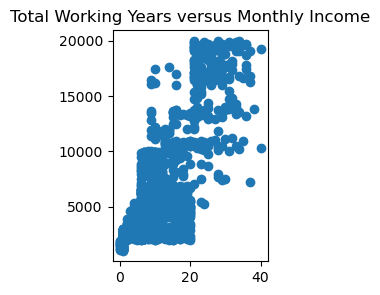

In [15]:
# scatterplot for TotalWorkingYears versus MonthlyIncome
figure(figsize=(2, 3))
plt.scatter(x= df["TotalWorkingYears"], y= df["MonthlyIncome"])
plt.title("Total Working Years versus Monthly Income")
# plt.savefig("scatterex4.png")
plt.show()

Plots for some of the highest Pearson correlation scores for the numerical variables. Each of the four examples display decent positive relationships between the two variables shown; however, the first three plots have a very strange pattern in that they have a rigid linear edge- perhaps this has to do with the manner in which the data was created.

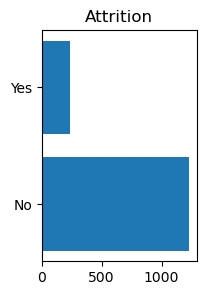

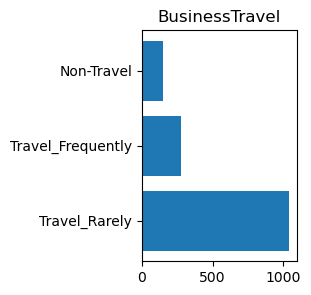

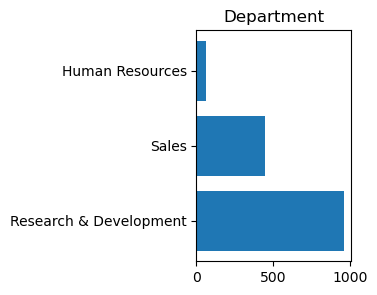

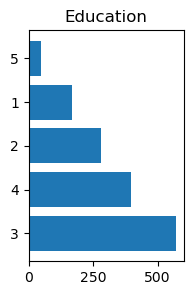

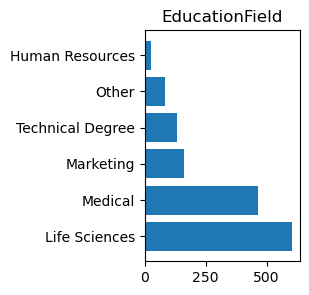

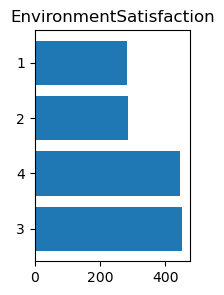

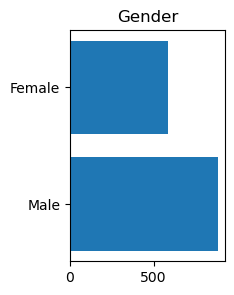

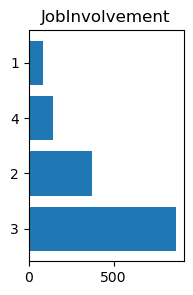

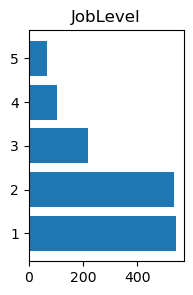

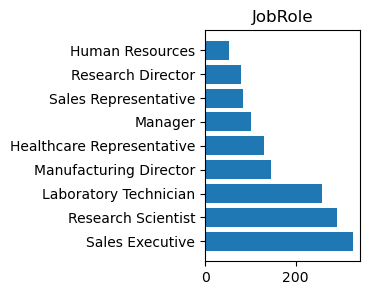

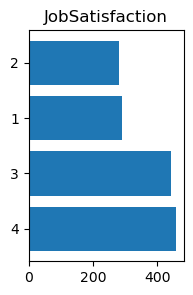

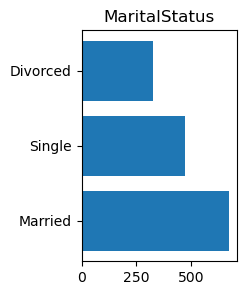

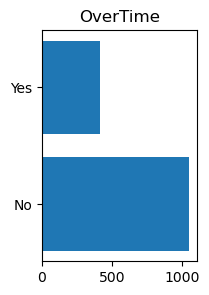

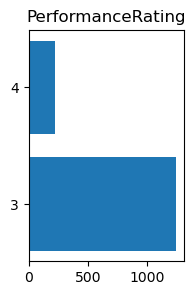

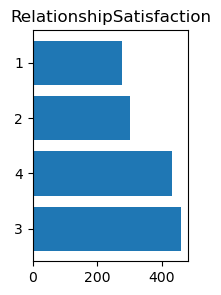

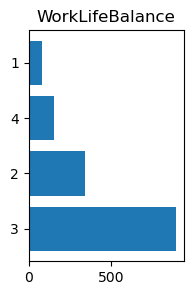

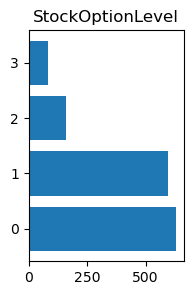

In [16]:
for x in cat_cols:
    x_val = df[x].value_counts()
    figure(figsize=(2, 3))
    plt.barh(x_val.keys(), x_val)
    plt.title(x)
    # plt.savefig("barplot-{}.png".format(x))
    plt.show()

Most of the employees travel rarely for work, reported no overtime, and received a performance rating of 3 instead of 4. The majority of the employees reported 0 and 1 for stock options, and assuming the intuitive leveling of 0 being no stock options this could possibly be a reason for attrition for some employees. Also, assuming that a value of 1 for JobLevel is equivalent to an entry-level position, many of the employees are lower-level employees. There are high reports of job satisfaction; however, if this was collected via a survey from HR, this could be a highly biased answer.

In [17]:
# binary categorical responses recoded to 0 or 1
# replace Yes and No values with 1 and 0 
df['Attrition'] = df['Attrition'].apply({'Yes':1, 'No':0}.get)
# replace Male and Female with 1 and 0
df['Gender'] = df['Gender'].apply({'Male':1, 'Female':0}.get)
# replace Yes and No with 1 and 0
df['OverTime'] = df['OverTime'].apply({'Yes':1, 'No':0}.get)
# replace 3 and 4 with 0 and 1
df['PerformanceRating'] = df['PerformanceRating'].apply({'4':1, '3':0}.get)

In [18]:
# columns that need dummy variables
dummy_cols = ['BusinessTravel', 'Department', 
            'Education', 'EducationField', 'EnvironmentSatisfaction', 
            'JobInvolvement', 'JobLevel', 'JobRole', 
            'JobSatisfaction', 'MaritalStatus',  
            'RelationshipSatisfaction', 'WorkLifeBalance', 
            'StockOptionLevel']

In [19]:
# dummy variables for nominal and ordinal categorical variables
df_dum = pd.get_dummies(df, prefix = dummy_cols, columns = dummy_cols)

In [20]:
# dataframe of just numerical columns
df_num = df[num_cols]

# correlation matrix, absolute value taken of each value, of just numerical columns
corr_matrix = df_num.corr().abs()

# get upper triangle of correlation matrix only (not including the diagonal)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# list of variables with correlation greater than 0.9- based only on the upper triangle of the correlation matrix
# which eliminates need to examine duplicates in list
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# list of columns to drop, if any
print(to_drop)

[]


In [21]:
corr_matrix

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,0.001686,0.024287,0.497855,0.028051,0.299635,0.003634,0.680381,0.019621,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,0.004985,0.023381,0.007707,0.032182,0.038153,0.022704,0.014515,0.002453,0.034055,0.009932,0.033229,0.026363
DistanceFromHome,0.001686,0.004985,1.000000,0.031131,0.017014,0.027473,0.029251,0.040235,0.004628,0.036942,0.009508,0.018845,0.010029,0.014406
HourlyRate,0.024287,0.023381,0.031131,1.000000,0.015794,0.015297,0.022157,0.009062,0.002334,0.008548,0.019582,0.024106,0.026716,0.020123
MonthlyIncome,0.497855,0.007707,0.017014,0.015794,1.000000,0.034814,0.149515,0.027269,0.772893,0.021736,0.514285,0.363818,0.344978,0.344079
MonthlyRate,0.028051,0.032182,0.027473,0.015297,0.034814,1.000000,0.017521,0.006429,0.026442,0.001467,0.023655,0.012815,0.001567,0.036746
NumCompaniesWorked,0.299635,0.038153,0.029251,0.022157,0.149515,0.017521,1.000000,0.010238,0.237639,0.066054,0.118421,0.090754,0.036814,0.110319
PercentSalaryHike,0.003634,0.022704,0.040235,0.009062,0.027269,0.006429,0.010238,1.000000,0.020608,0.005221,0.035991,0.001520,0.022154,0.011985
TotalWorkingYears,0.680381,0.014515,0.004628,0.002334,0.772893,0.026442,0.237639,0.020608,1.000000,0.035662,0.628133,0.460365,0.404858,0.459188
TrainingTimesLastYear,0.019621,0.002453,0.036942,0.008548,0.021736,0.001467,0.066054,0.005221,0.035662,1.000000,0.003569,0.005738,0.002067,0.004096


In [22]:
# set seaborn color palette
sns.color_palette("tab10")
sns.set(style="darkgrid")

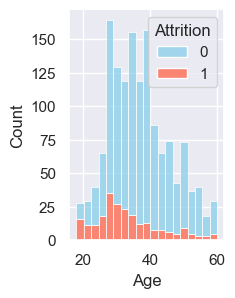

In [23]:
# histogram of Age, colorcoded by Attrition value
figure(figsize=(2, 3))
g = sns.histplot(data=df, x='Age', 
                 hue='Attrition', palette=['skyblue','tomato'], multiple='stack').figure.savefig("Age-2class.png")

The distribution of age for employees that experienced attrition is similar in distribution to those that did not, with a slight deviation at the lower age range where there appears to be a slightly higher value of attrition than is seen in the overall population.

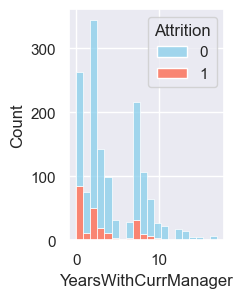

In [24]:
# histogram of YearsWithCurrManager, colorcoded by Attrition value
figure(figsize=(2, 3))
g = sns.histplot(data=df, x='YearsWithCurrManager', 
                 hue='Attrition', palette=['skyblue','tomato'], multiple='stack').figure.savefig("YearsWithCurrManager-2class.png")


In this plot, we see a clearer bimodal distribution than in the overall plot for YearWithCurrManager. For the attrition class, the plot suggests the trend that attrition is perhaps more likely when management is changed. 

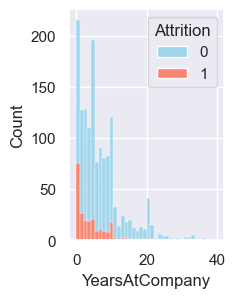

In [25]:
# histogram of YearsAtCompany, colorcoded by Attrition value
figure(figsize=(2, 3))
g = sns.histplot(data=df, x='YearsAtCompany', 
                 hue='Attrition', palette=['skyblue','tomato'], multiple='stack').figure.savefig("YearsAtCompany-2class.png")

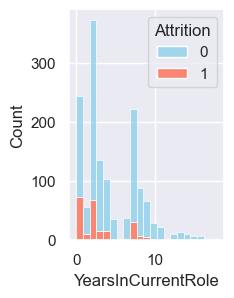

In [26]:
# histogram of YearsInCurrentRole, colorcoded by Attrition value
figure(figsize=(2, 3))
g = sns.histplot(data=df, x='YearsInCurrentRole', 
                 hue='Attrition', palette=['skyblue','tomato'], multiple='stack').figure.savefig("YearsInCurrentRole-2class.png")

One possible explanation for the two spikes in the attrition class at 0 and 2 years would be that there are cycles at which attrition is most likely to occur- within the first year and again within the second year. After that, it appears from the graph that attrition becomes less common. If this trend is statistically significant in the data, it would suggest that organizations should spend the most amount of resources making sure that new hires acclimate and and to focus on other factors that prove most predictive within the first year of an employee being with the organization in order to prevent high levels of attrition at the earlier stages of their career with said organization. 

## Milestone 4

In [27]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [28]:
df_dum.head()

,Age,Attrition,DailyRate,DistanceFromHome,Gender,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,...,RelationshipSatisfaction_3,RelationshipSatisfaction_4,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3
0,41,1,1102,1,0,94,5993,19479,8,1,...,0,0,1,0,0,0,1,0,0,0
1,49,0,279,8,1,61,5130,24907,1,0,...,0,1,0,0,1,0,0,1,0,0
2,37,1,1373,2,1,92,2090,2396,6,1,...,0,0,0,0,1,0,1,0,0,0
3,33,0,1392,3,0,56,2909,23159,1,1,...,1,0,0,0,1,0,1,0,0,0
4,27,0,591,2,1,40,3468,16632,9,0,...,0,1,0,0,1,0,0,1,0,0


In [29]:
# split data into 80% train and 20% test
x = df_dum.loc[:, df_dum.columns != "Attrition"]
y = df_dum["Attrition"]
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    random_state = 42, 
                                                    train_size = 0.80)

In [30]:
# standardize data
# instance of the StandardScaler
sc = StandardScaler()
# fit the scaler to the data
x_train_norm = sc.fit_transform(x_train)
# transform the data using the scaler
x_test_norm = sc.transform(x_test)

In [31]:
# create baseline model using dummy classifier
dummy = DummyClassifier()
# train dummy model
dummy.fit(x_train_norm, y_train)
# get accuracy score
dummy.score(x_test_norm, y_test)

0.8673469387755102

#### Logistic Regression Model

In [32]:
# logistic regression model
model = LogisticRegression().fit(x_train_norm, y_train)
# accuracy on train data
model.score(x_train_norm, y_train)

0.9056122448979592

In [33]:
# accuracy on test data
accuracy_log = model.score(x_test_norm, y_test)
# precision
precision_log = metrics.precision_score(y_test, model.predict(x_test_norm))
# recall
recall_log = metrics.recall_score(y_test, model.predict(x_test_norm))
# f1_score
f1_log = metrics.f1_score(y_test, model.predict(x_test_norm))
print("Accuracy: {}\nPrecision: {}\nRecall: {}\nf1 score: {}".format(accuracy_log, precision_log, recall_log, f1_log))

Accuracy: 0.8843537414965986
Precision: 0.5757575757575758
Recall: 0.48717948717948717
f1 score: 0.5277777777777778


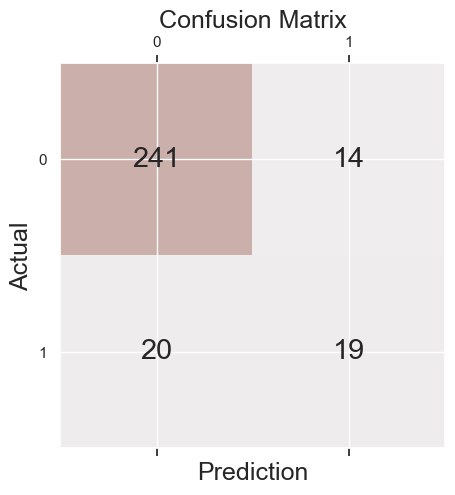

In [34]:
# confusion matrix
cm_log = confusion_matrix(y_test, model.predict(x_test_norm))
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_log, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm_log.shape[0]):
    for j in range(cm_log.shape[1]):
        ax.text(x=j, y=i,s=cm_log[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Logistic Regression Feature Importance

<Axes: ylabel='Feature'>

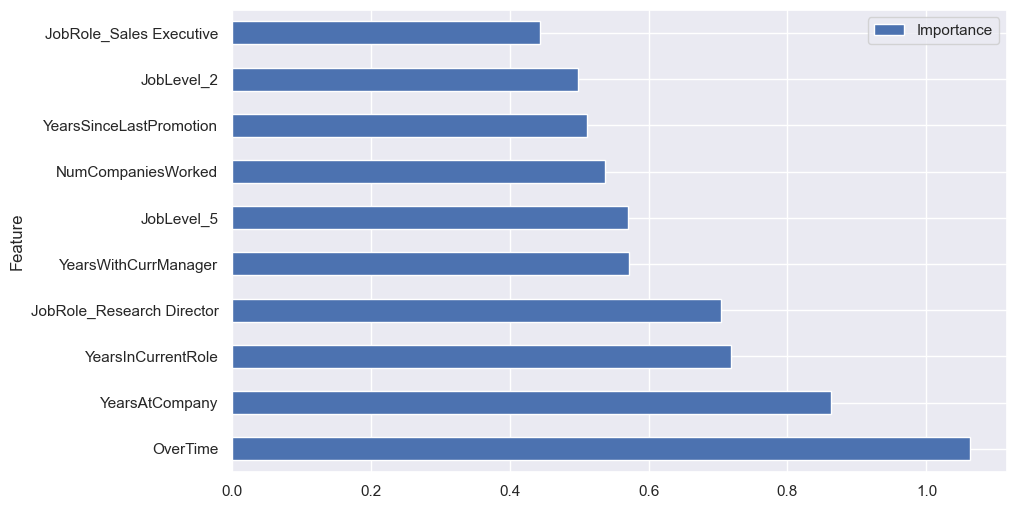

In [35]:
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=False).head(10)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

#### k-Nearest Neighbors Model

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
# create standardizer
standardizer = StandardScaler()
# create kNN classifier
knn = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1)
# create pipeline
pipe = Pipeline([("standardizer", standardizer), ("knn", knn)])
# create search space
search = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}]
# create grid search
knn = GridSearchCV(pipe, search, cv = 5, verbose = 0).fit(x_train_norm, y_train)

In [37]:
# k-value
knn.best_estimator_.get_params()["knn"]

KNeighborsClassifier(n_jobs=-1, n_neighbors=6)

In [38]:
# accuracy on train data
knn.score(x_train_norm, y_train)

0.8554421768707483

In [39]:
# accuracy on test data
accuracy_knn = knn.score(x_test_norm, y_test)
# precision
precision_knn = metrics.precision_score(y_test, knn.predict(x_test_norm))
# recall
recall_knn = metrics.recall_score(y_test, knn.predict(x_test_norm))
# f1_score
f1_knn = metrics.f1_score(y_test, knn.predict(x_test_norm))
print("Accuracy: {}\nPrecision: {}\nRecall: {}\nf1 score: {}".format(accuracy_knn, precision_knn, recall_knn, f1_knn))

Accuracy: 0.8775510204081632
Precision: 1.0
Recall: 0.07692307692307693
f1 score: 0.14285714285714288


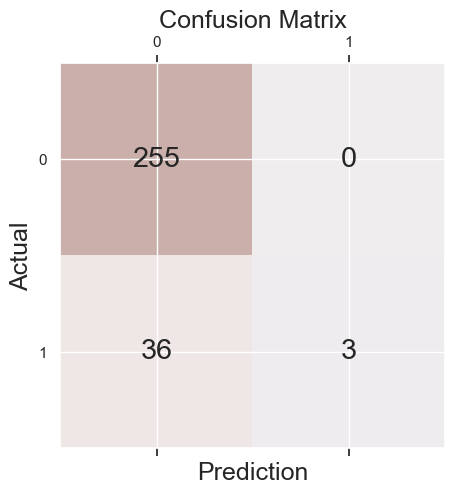

In [40]:
# confusion matrix
cm_knn = confusion_matrix(y_test, knn.predict(x_test_norm))
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_knn, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm_knn.shape[0]):
    for j in range(cm_knn.shape[1]):
        ax.text(x=j, y=i,s=cm_knn[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Decision Tree Classifier Model

In [41]:
from sklearn.tree import DecisionTreeClassifier
# define the model
dt = DecisionTreeClassifier().fit(x_train_norm, y_train)
# accuracy for train data
dt.score(x_train_norm, y_train)

1.0

In [42]:
# accuracy on test data
accuracy_dt = dt.score(x_test_norm, y_test)
# precision
precision_dt = metrics.precision_score(y_test, dt.predict(x_test_norm))
# recall
recall_dt = metrics.recall_score(y_test, dt.predict(x_test_norm))
# f1_score
f1_dt = metrics.f1_score(y_test, dt.predict(x_test_norm))
print("Accuracy: {}\nPrecision: {}\nRecall: {}\nf1 score: {}".format(accuracy_dt, precision_dt, recall_dt, f1_dt))

Accuracy: 0.7687074829931972
Precision: 0.17777777777777778
Recall: 0.20512820512820512
f1 score: 0.19047619047619047


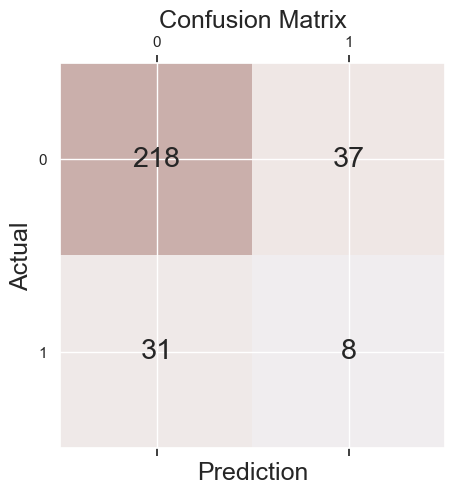

In [43]:
# confusion matrix
cm_dt = confusion_matrix(y_test, dt.predict(x_test_norm))
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_dt, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm_dt.shape[0]):
    for j in range(cm_dt.shape[1]):
        ax.text(x=j, y=i,s=cm_dt[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Decision Tree Classifier for Feature Importance

In [44]:
# get importance
importance = dt.feature_importances_
# summarize feature importance
top10 = pd.Series(importance, index=x.columns)
top10.sort_values(ascending=False, inplace=True)
print(top10.head(10))

MonthlyIncome              0.114882
OverTime                   0.078718
DailyRate                  0.069553
HourlyRate                 0.068236
MonthlyRate                0.050521
Age                        0.047018
DistanceFromHome           0.044323
YearsSinceLastPromotion    0.041969
TotalWorkingYears          0.037731
YearsInCurrentRole         0.034232
dtype: float64


#### Logistic Regression Model with only top 10 Most Important Features

In [45]:
top_features = feature_importance["Feature"].values.tolist()
# split data into 80% train and 20% test
x1 = df_dum[top_features]
y1 = df_dum["Attrition"]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, 
                                                    random_state = 42, 
                                                    train_size = 0.80)

In [46]:
# standardize data
# instance of the StandardScaler
sc = StandardScaler()
# fit the scaler to the data
x1_train_norm = sc.fit_transform(x1_train)
# transform the data using the scaler
x1_test_norm = sc.transform(x1_test)

In [47]:
# logistic regression model
model2 = LogisticRegression().fit(x1_train_norm, y1_train)
# accuracy on train data
model2.score(x1_train_norm, y1_train)

0.8477891156462585

In [48]:
# accuracy on test data
accuracy_log2 = model2.score(x1_test_norm, y1_test)
# precision
precision_log2 = metrics.precision_score(y1_test, model2.predict(x1_test_norm))
# recall
recall_log2 = metrics.recall_score(y1_test, model2.predict(x1_test_norm))
# f1_score
f1_log2 = metrics.f1_score(y1_test, model2.predict(x1_test_norm))
print("Accuracy: {}\nPrecision: {}\nRecall: {}\nf1 score: {}".format(accuracy_log2, precision_log2, recall_log2, f1_log2))

Accuracy: 0.8367346938775511
Precision: 0.15384615384615385
Recall: 0.05128205128205128
f1 score: 0.07692307692307693


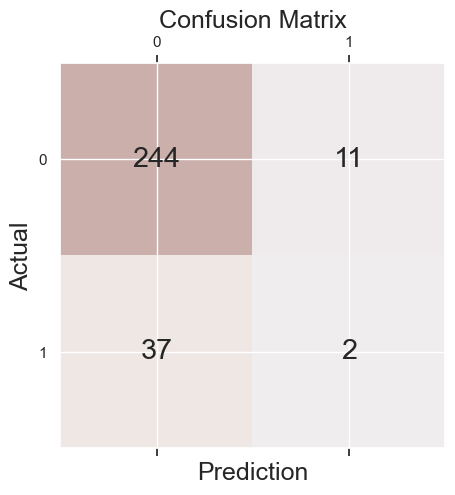

In [49]:
# confusion matrix
cm_log2 = confusion_matrix(y1_test, model2.predict(x1_test_norm))
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_log2, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm_log2.shape[0]):
    for j in range(cm_log2.shape[1]):
        ax.text(x=j, y=i,s=cm_log2[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Decision Tree with Only Top 10 Features (From Logistic Regression Model)

In [50]:
# define the model
dt2 = DecisionTreeClassifier().fit(x1_train_norm, y1_train)
# accuracy for train data
dt2.score(x1_train_norm, y1_train)

0.9591836734693877

In [51]:
# accuracy on test data
accuracy_dt2 = dt2.score(x1_test_norm, y1_test)
# precision
precision_dt2 = metrics.precision_score(y1_test, dt2.predict(x1_test_norm))
# recall
recall_dt2 = metrics.recall_score(y1_test, dt2.predict(x1_test_norm))
# f1_score
f1_dt2 = metrics.f1_score(y1_test, dt2.predict(x1_test_norm))
print("Accuracy: {}\nPrecision: {}\nRecall: {}\nf1 score: {}".format(accuracy_dt2, precision_dt2, recall_dt2, f1_dt2))

Accuracy: 0.7857142857142857
Precision: 0.25
Recall: 0.3076923076923077
f1 score: 0.27586206896551724


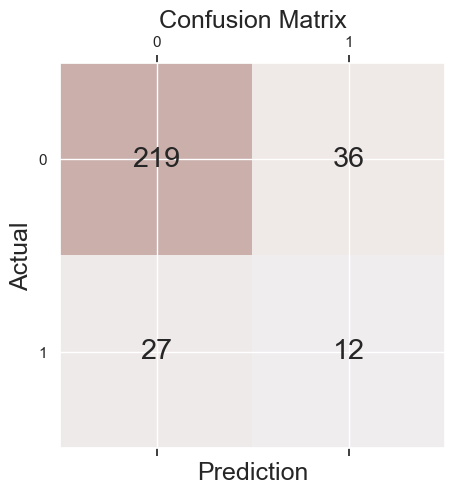

In [52]:
# confusion matrix
cm_dt2 = confusion_matrix(y1_test, dt2.predict(x1_test_norm))
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_dt2, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm_dt2.shape[0]):
    for j in range(cm_dt2.shape[1]):
        ax.text(x=j, y=i,s=cm_dt2[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Logistic Regression with Upsampled Data

In [53]:
df_train = pd.concat([x_train, y_train], axis=1)

In [54]:
df_train.head()
df_train["Attrition"].value_counts()

0    978
1    198
Name: Attrition, dtype: int64

In [55]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df_train[(df_train['Attrition']==0)] 
df_minority = df_train[(df_train['Attrition']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 978, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [56]:
df_upsampled["Attrition"].value_counts()

1    978
0    978
Name: Attrition, dtype: int64

In [57]:
x_train_up = df_upsampled.loc[:, df_upsampled.columns != "Attrition"]
y_train_up = df_upsampled["Attrition"]

In [58]:
# standardize data
# instance of the StandardScaler
sc = StandardScaler()
# fit the scaler to the data
x_train_up_norm = sc.fit_transform(x_train_up)
# transform the data using the scaler
x_test_up_norm = sc.transform(x_test)

In [59]:
# logistic regression model
model3 = LogisticRegression().fit(x_train_up_norm, y_train_up)
# accuracy on train data
model3.score(x_train_up_norm, y_train_up)

0.8430470347648262

In [60]:
# accuracy on test data
accuracy_log3 = model3.score(x_test_up_norm, y_test)
# precision
precision_log3 = metrics.precision_score(y_test, model3.predict(x_test_up_norm))
# recall
recall_log3 = metrics.recall_score(y_test, model3.predict(x_test_up_norm))
# f1_score
f1_log3 = metrics.f1_score(y_test, model3.predict(x_test_up_norm))
print("Accuracy: {}\nPrecision: {}\nRecall: {}\nf1 score: {}".format(accuracy_log3, precision_log3, recall_log3, f1_log3))

Accuracy: 0.7517006802721088
Precision: 0.3111111111111111
Recall: 0.717948717948718
f1 score: 0.434108527131783


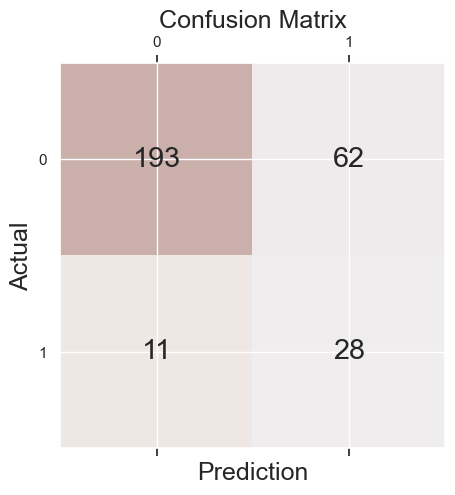

In [61]:
# confusion matrix
cm_log3 = confusion_matrix(y_test, model3.predict(x_test_up_norm))
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_log2, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm_log3.shape[0]):
    for j in range(cm_log3.shape[1]):
        ax.text(x=j, y=i,s=cm_log3[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

<Axes: ylabel='Feature'>

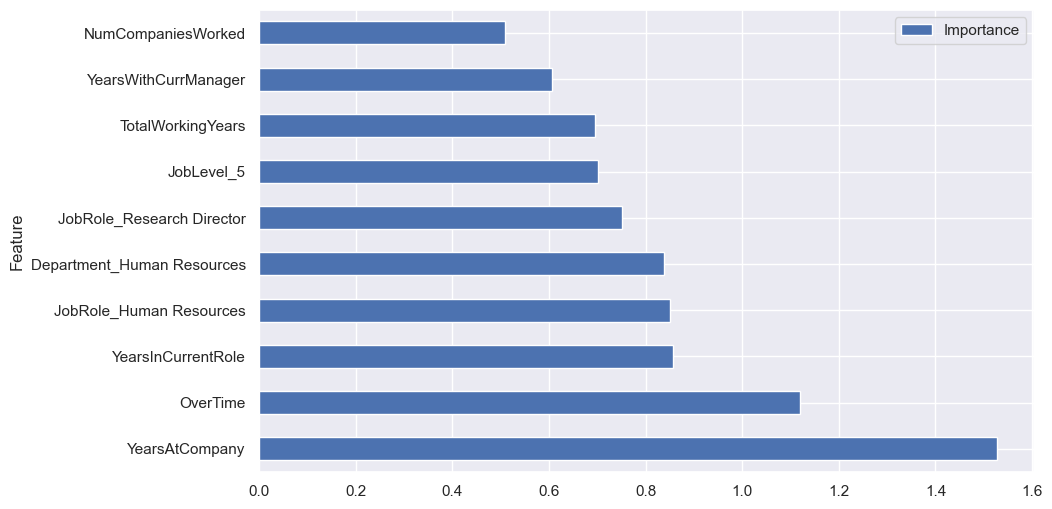

In [62]:
coefficients = model3.coef_[0]

feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=False).head(10)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

The first three models trained (logistic regression, k-Nearest Neighbors, and decision tree) each had their own strengths and weaknesses. The logistic regression model had the highest accuracy (88.4%), but only middling precision and recall scores (58.6% and 43.6%). The k-Nearest Neighbors model had a slightly lower accuracy (87.8%) but had a perfect precision score of 100% but a poor recall score (7.7%). The decision tree model was grossly overfit, which was demonstrated by the 100% accuracy on the training data, but which resulted in only about 76% accuracy on the test data, 16% precision and 18% recall. The logistic regression score had the highest f1 score (52.8%). 

The k-Nearest Neighbor model excels at predicting when an employee will not experience attrition, but does not do well predicting when an employee will experience attrition. The model that was best at predicting when an employee would experience attrition is the logistic regression model, with the highest (although not excellent) recall and f1 scores of the three models.

The next three models represent different attempts to improve model performance. The logistic regression model with only the top 10 features (identified in the first logistic regression model) grossly underperformed with only a slight decrease in accuracy (a drop from 88.4% to 83.7%) but significant decreases in the precision, recall, and f1 scores. The decision tree built with these same 10 features represents an improvement from the overfit decision tree, with an accuracy of 77.9%, 24% precision, and 30.8% recall. This does not rival the original logistic regression from above (as this model has only a 27% f1 score) but it is the highest performing model type other than the logistic regression algorithm. The imbalanced class weights are addressed in the final model built, where the training data was upsampled so the class weights for Attrition would be equivalent; however, this model does not necessarily outperform the original logistic regression model as the accuracy, precision, and f1 scores are all lower in this newer model. The recall score is much higher (at 71.8%), which tells us that this model is slightly better at identifying when employees with experience attrition, but it also has a high false-postive rate as well. 